In [ ]:
# Source: https://github.com/kaleko/CourseraML/tree/master/ex7

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio
import matplotlib
import scipy.optimize as opt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ex7data2 = sio.loadmat('/content/drive/My Drive/AndrewNg-ML/ex7data2.mat');

In [7]:
X = ex7data2['X']

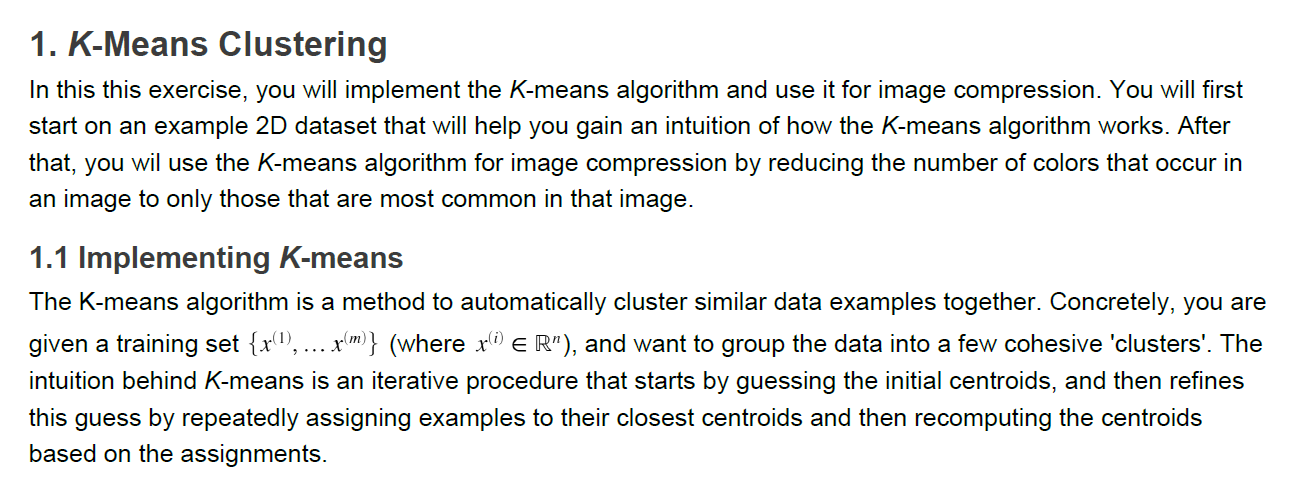

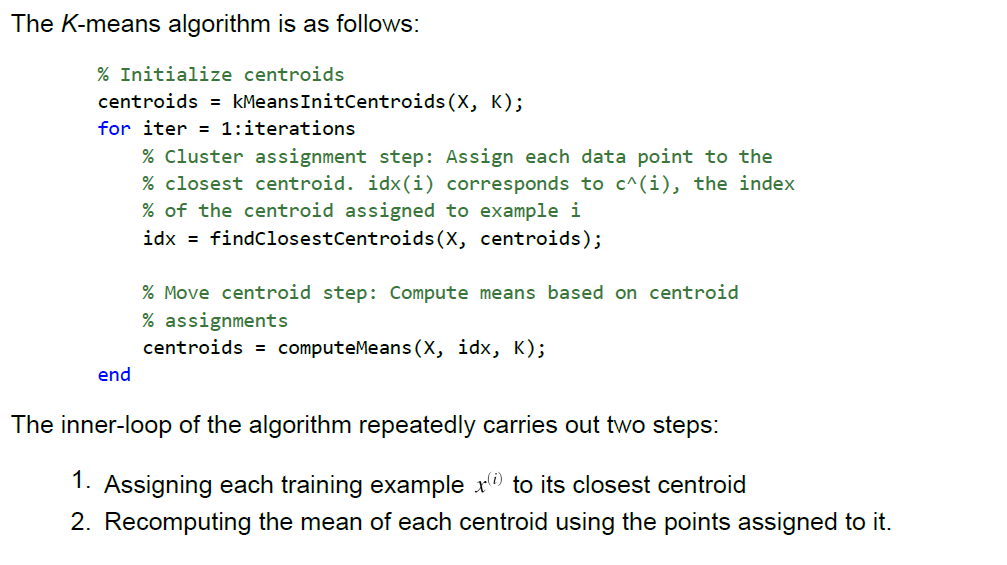

In [4]:
#Choose the number of centroids... K = 3
K = 3
#Choose the initial centroids
initial_centroids = np.array([[3,3],[6,2],[8,5]])

In [20]:
#Visualizing the data
def plotData(X, centroids, idxs = None):

    """
    Fucntion to plot the data and color it accordingly.
    myidxs should be the latest iteraction index vector
    mycentroids should be a vector of centroids, one per iteration
    """
    
    colors = ['b','g','gold','darkorange','salmon','olivedrab']
    
    assert X[0].shape == centroids[0][0].shape
    assert centroids[-1].shape[0] <= len(colors)

    #If idxs is supplied, divide up X into colors
    if idxs is not None:
        assert idxs.shape[0] == X.shape[0]
        subX = []
        for x in range(centroids[0].shape[0]):
            subX.append(np.array([X[i] for i in range(X.shape[0]) if idxs[i] == x]))
    else:
        subX = [X]
        
    fig = plt.figure(figsize=(8,6))
    for x in range(len(subX)):
        newX = subX[x]
        plt.plot(newX[:,0],newX[:,1],'o',color=colors[x],
                 alpha=0.75, label='Data Points: Cluster %d'%x)
    plt.xlabel('x1',fontsize=14)
    plt.ylabel('x2',fontsize=14)
    plt.title('Plot of X Points',fontsize=16)
    plt.grid(True)

    #Drawing a history of centroid movement
    tempx, tempy = [], []
    for centroid in centroids:
        tempx.append(centroid[:,0])
        tempy.append(centroid[:,1])
    
    for x in range(len(tempx[0])):
        plt.plot(tempx, tempy, 'rx--', markersize=8)

    leg = plt.legend(loc=4, framealpha=0.5)

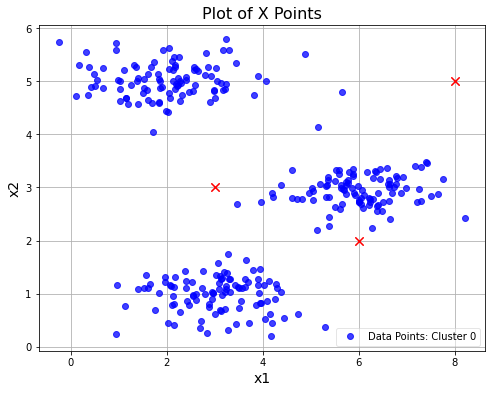

In [11]:
plotData(X,[initial_centroids])

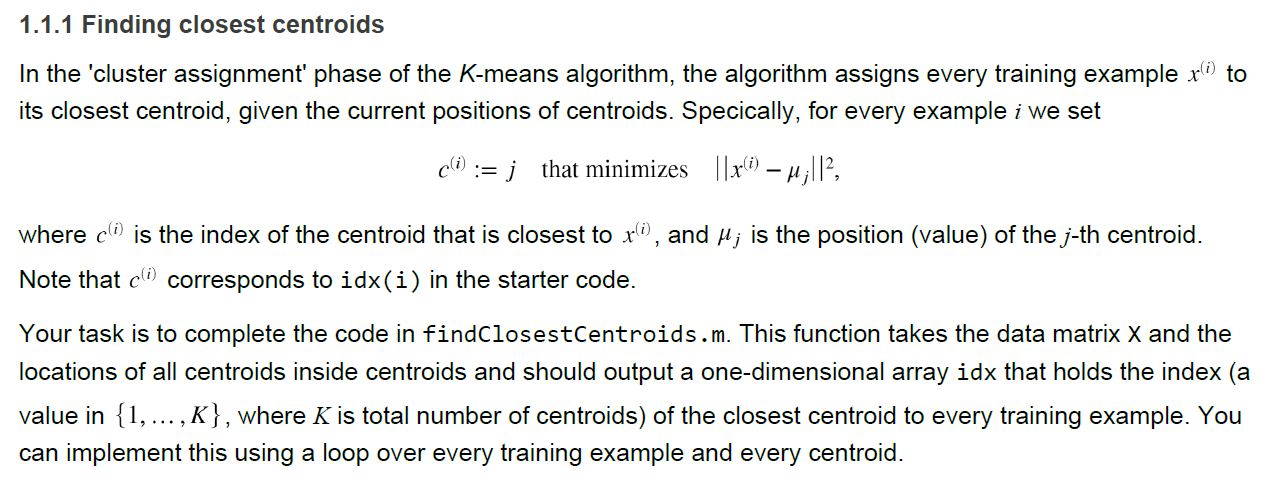

In [12]:
def distSquared(point1, point2):
    assert point1.shape == point2.shape
    return np.sum(np.square(point2-point1))

In [15]:
# initial_centroids = np.array([[3,3],[6,2],[8,5]])
def findClosestCentroids(X, centroids):
    """
    Function takes in the (m,n) X matrix
    (where m is the # of points, n is # of features per point)
    and the (K,n) centroid seed matrix
    (where K is the # of centroids (clusters)
    and returns a (m,1) vector of cluster indices 
    per point in X (0 through K-1)
    """
    idxs = np.zeros((X.shape[0],1))
    
    #Loop through each data point in X
    for x in range(idxs.shape[0]):
        point = X[x]
        #Compare this point to each centroid,
        #Keep track of shortest distance and index of shortest distance
        mindist, idx = 9999999, 0
        for i in range(centroids.shape[0]):
            centroid = centroids[i]
            distsquared = distSquared(centroid,point)
            if distsquared < mindist:
                mindist = distsquared
                idx = i
        #With the best index found, modify the result idx vector
        idxs[x] = idx
        
    return idxs

In [18]:
idxs = findClosestCentroids(X,initial_centroids)

#you should see the output [1 3 2] corresponding to the 
#centroid assignments for the first 3 examples.
#Note my indices start at 0, so I should see [0, 2, 1]
print (idxs[:10].flatten())

[0. 2. 1. 0. 0. 0. 0. 0. 0. 0.]


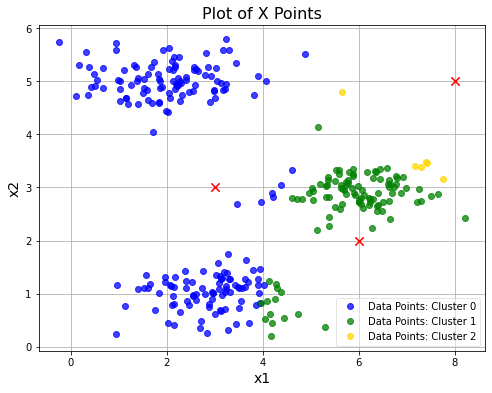

In [21]:
# results of clustering with np.array([[3,3],[6,2],[8,5]]) as centroids 
plotData(X, [initial_centroids], idxs)

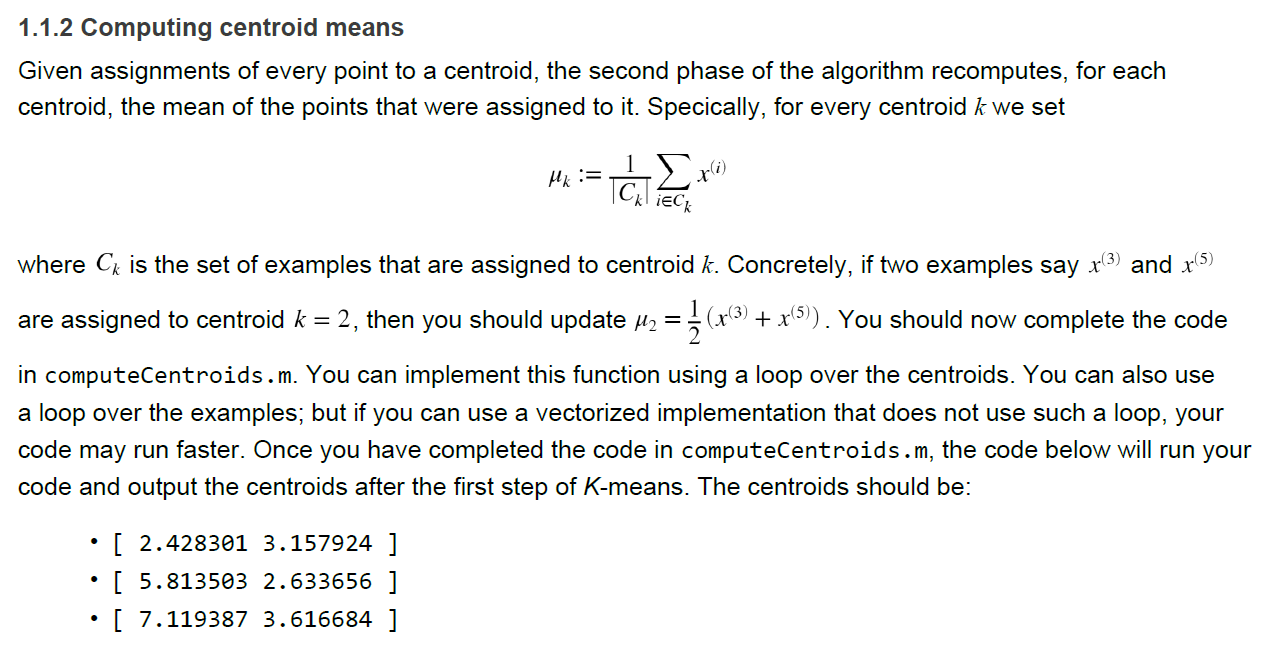

In [22]:
def computeCentroids(X, idxs):
    """
    Function takes in the X matrix and the index vector
    and computes a new centroid matrix.
    """
    subX = []
    for x in range(len(np.unique(idxs))):
        subX.append(np.array([X[i] for i in range(X.shape[0]) if idxs[i] == x]))
    return np.array([np.mean(x, axis=0) for x in subX])

In [23]:
centroids_after_first_step = computeCentroids(X, idxs)
centroids_after_first_step

array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]])

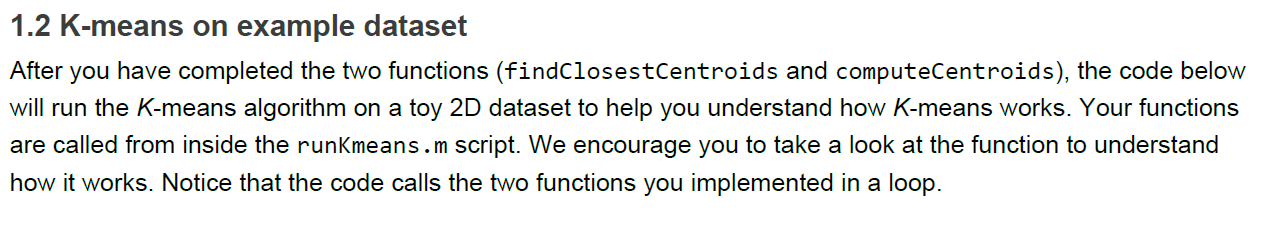

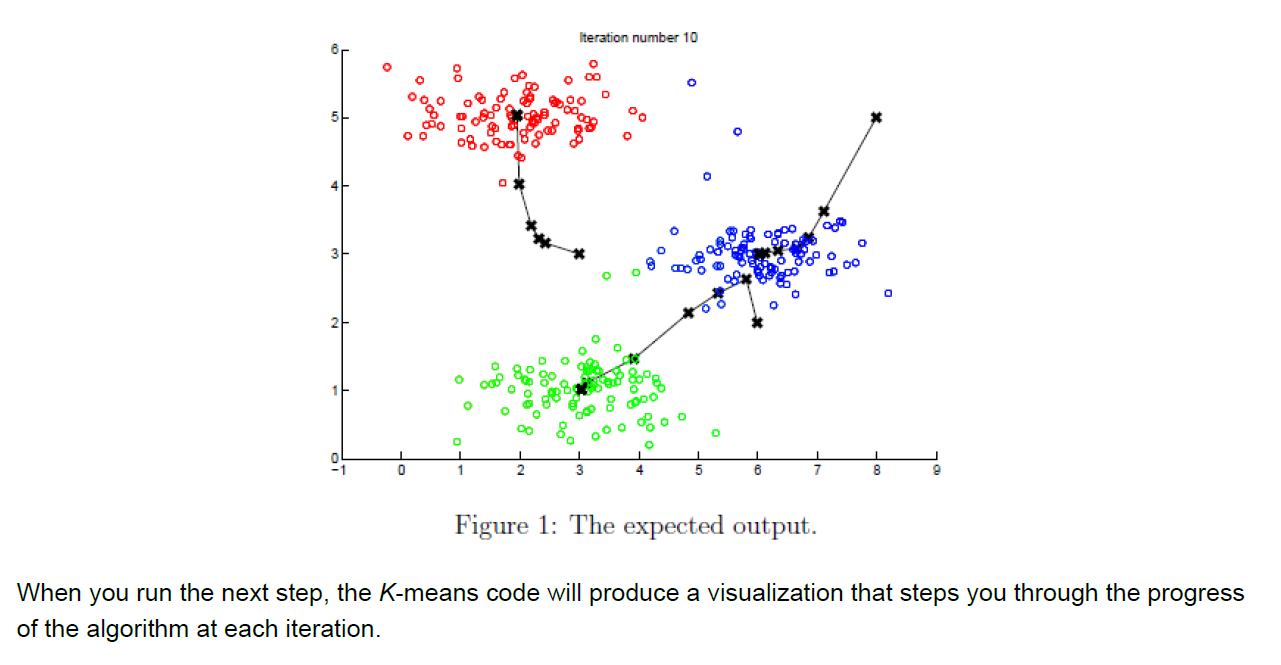

In [24]:
def runKMeans(X, initial_centroids, K, n_iter):
    """
    Function that actually does the iterations
    """
    centroid_history = []
    current_centroids = initial_centroids
    for i in range(n_iter):
        centroid_history.append(current_centroids)
        idxs = findClosestCentroids(X, current_centroids)  # cluster index of each point in X 
        current_centroids = computeCentroids(X, idxs)      # return new centroid based on mean of points 
        
    return idxs, centroid_history

In [25]:
idxs_after_loop, centroid_history = runKMeans(X, initial_centroids, K=3, n_iter=10)

In [28]:
print(idxs_after_loop[:10])

[[0.]
 [2.]
 [2.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [29]:
print(centroid_history[:10])

[array([[3, 3],
       [6, 2],
       [8, 5]]), array([[2.42830111, 3.15792418],
       [5.81350331, 2.63365645],
       [7.11938687, 3.6166844 ]]), array([[2.31325526, 3.22830617],
       [5.33273768, 2.43159599],
       [6.8653618 , 3.23293995]]), array([[2.19692479, 3.42136707],
       [4.83555397, 2.12976745],
       [6.6560054 , 3.0751355 ]]), array([[1.98241171, 4.0250785 ],
       [3.91150763, 1.47060546],
       [6.34008592, 3.05366642]]), array([[1.95399466, 5.02557006],
       [3.12663743, 1.1121712 ],
       [6.12919526, 3.01606258]]), array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]]), array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]]), array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]]), array([[1.95399466, 5.02557006],
       [3.04367119, 1.01541041],
       [6.03366736, 3.00052511]])]


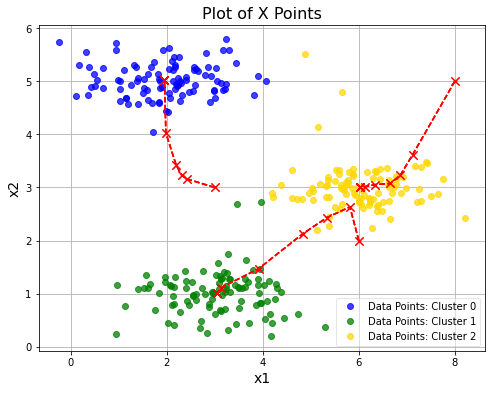

In [30]:
plotData(X, centroid_history, idxs_after_loop)

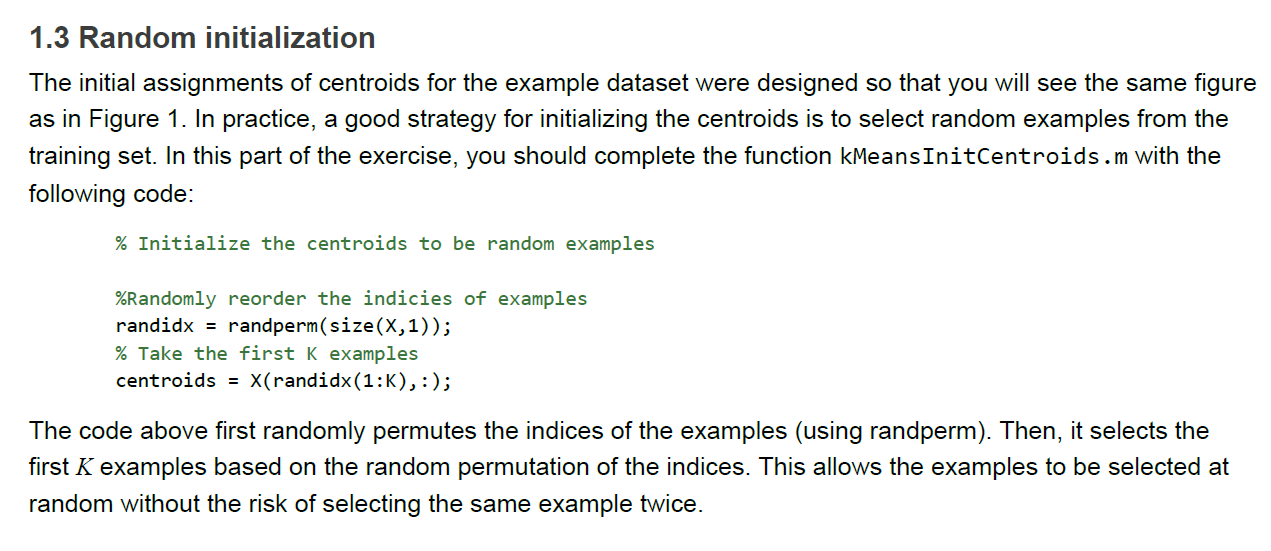

In [33]:
from random import sample 
def chooseKRandomCentroids(X, K):
    rand_indices = sample(range(0, X.shape[0]), K)
    return np.array([X[i] for i in rand_indices])  

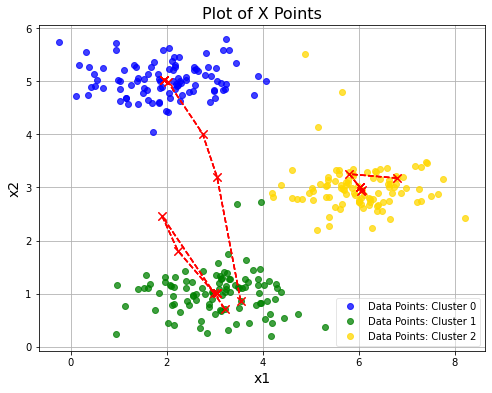

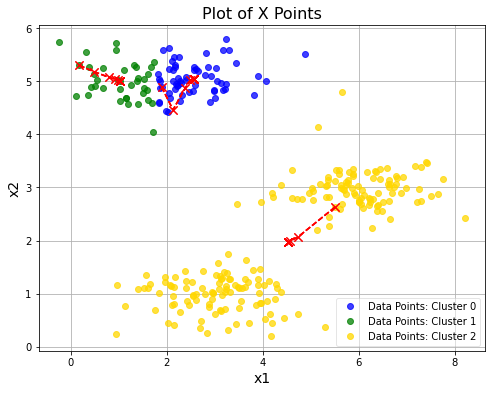

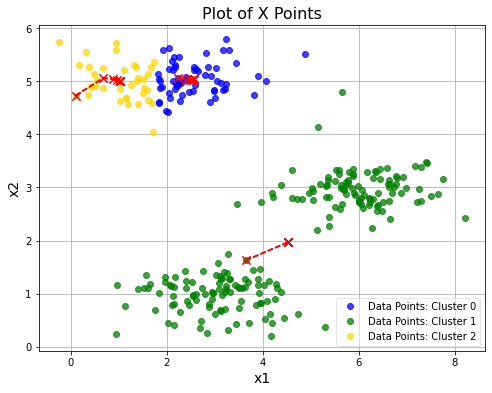

In [34]:
#Let's choose random initial centroids and see the resulting 
#centroid progression plot.. perhaps three times in a row
for x in range(3):
    idxs, centroid_history = runKMeans(X, chooseKRandomCentroids(X,K=3),
                                       K=3,n_iter=10)
    plotData(X,centroid_history,idxs)

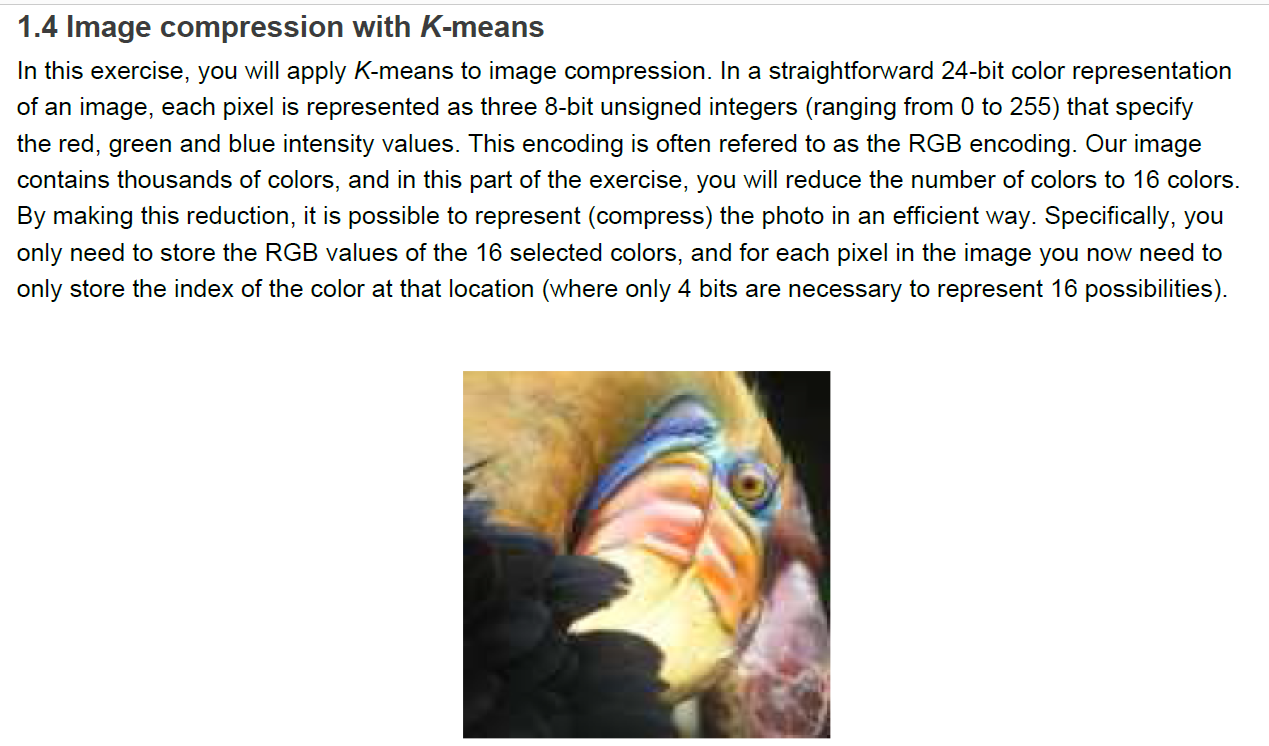

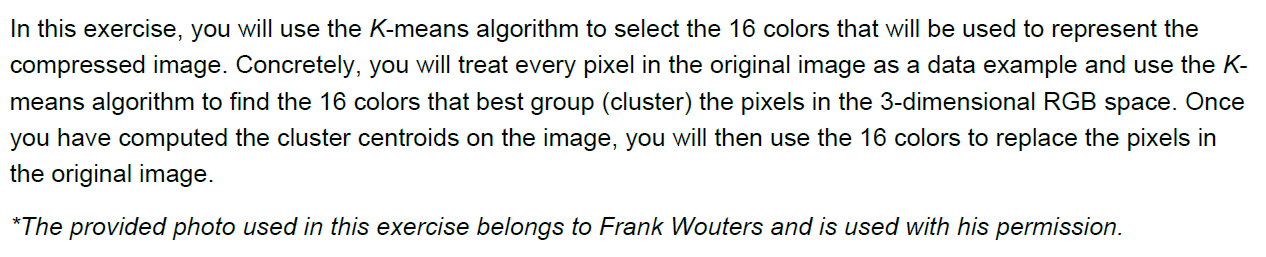

In [37]:
import imageio
A =  imageio.imread('/content/drive/My Drive/AndrewNg-ML/bird_small.png');

(128, 128, 3)


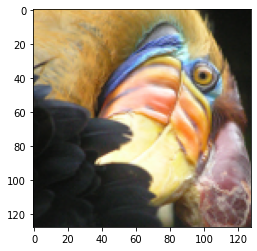

In [38]:
print (A.shape)
dummy = plt.imshow(A)

In [39]:
# Divide every entry in A by 255 so all values are in the range of 0 to 1
A = A / 255.

# Unroll the image to shape (16384,3) (16384 is 128*128)
A = A.reshape(-1, 3)

# Run k-means on this data, forming 16 clusters, with random initialization
K_img = 16
idxs_img, centroid_history_img = runKMeans(A, chooseKRandomCentroids(A, K_img), K_img, n_iter=10)

In [40]:
# Now I have 16 centroids, each representing a color.
# Let's assign an index to each pixel in the original image dictating
# which of the 16 colors it should be
idxs_img_final = findClosestCentroids(A, centroid_history_img[-1])

In [41]:
final_centroids = centroid_history_img[-1]
# Now loop through the original image and form a new image
# that only has 16 colors in it
final_image = np.zeros((idxs_img_final.shape[0], 3))
for x in range(final_image.shape[0]):
    final_image[x] = final_centroids[int(idxs_img_final[x])]

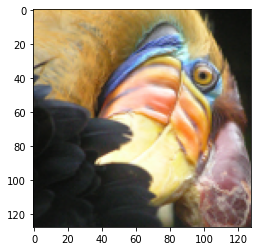

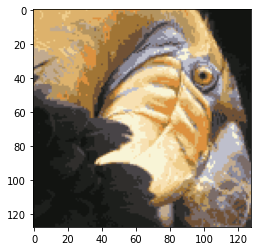

In [42]:
# Reshape the original image and the new, final image and draw them
# To see what the "compressed" image looks like
plt.figure()
dummy = plt.imshow(A.reshape(128,128,3))
plt.figure()
dummy = plt.imshow(final_image.reshape(128,128,3))